In [1]:
import numpy as np
from scipy.stats import nbinom , binom, hypergeom
from scipy import special
import matplotlib.pyplot as plt


1 - Escreva uma função que implementa uma única realização da variável aleatória K do Experimento 1a, para (t, g, n) genéricos. Em seguida, utilize as funções escritas com (t, g, n) = (8, 4, 6) e com (t, g, n) = (100, 20, 95).  
* Plote figuras contendo a função massa de probabilidade teórica, bem como aquela obtida via simulação de Monte Carlo.
* Calcule os valores teóricos da média e da variância, bem como aqueles obtidos via simulação.

### Para (t, g, n) = (8, 4, 6)

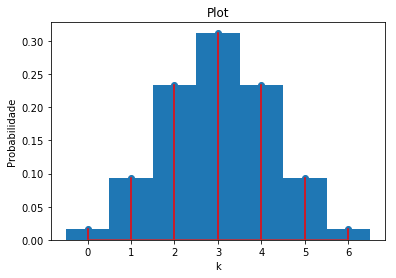

---Valores Praticos ---
Media: 3.000249 Variancia: 1.5016289379990002
---Valores Teoricos ---
Media: 3.0 Variancia: 1.5


In [200]:
t, g, n = 8, 4, 6

#Pratico
p = g/t
R = binom.rvs(n, p, size=1000000)
plt.hist(R,bins=np.arange(0, n+2)-0.5,normed='True')
#Teorico
rv = binom(n,p)
x = np.arange(0, n+1)
y = rv.pmf(x)
plt.stem(x,y,'r')
plt.title("Plot")
plt.xlabel("k")
plt.ylabel("Probabilidade")
plt.show()
print("---Valores Praticos ---")
print("Media: {} Variancia: {}".format(np.mean(R),np.var(R)))
print("---Valores Teoricos ---")
print("Media: {} Variancia: {}".format(binom.mean(n,p),binom.var(n,p)))

### Para (t, g, n) = (100, 20, 95)

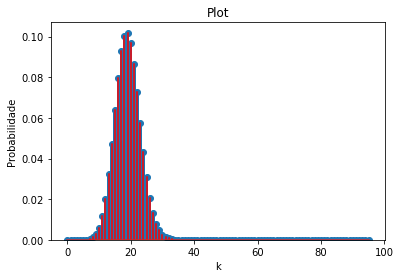

---Valores Praticos ---
Media: 19.006113 Variancia: 15.205253631231
---Valores Teoricos ---
Media: 19.0 Variancia: 15.200000000000001


In [201]:
t, g, n = 100, 20, 95

#Pratico
p = g/t
R = binom.rvs(n, p, size=1000000)
plt.hist(R,bins=np.arange(0, n+2)-0.5,normed='True')
#Teorico
rv = binom(n,p)
x = np.arange(0, n+1)
y = rv.pmf(x)
plt.stem(x,y,'r')
plt.title("Plot")
plt.xlabel("k")
plt.ylabel("Probabilidade")
plt.show()
print("---Valores Praticos ---")
print("Media: {} Variancia: {}".format(np.mean(R),np.var(R)))
print("---Valores Teoricos ---")
print("Media: {} Variancia: {}".format(binom.mean(n,p),binom.var(n,p)))

## 2 Repita o exercício anterior, agora considerando o Experimento 1b.  

### Para (t, g, n) = (8, 4, 6)

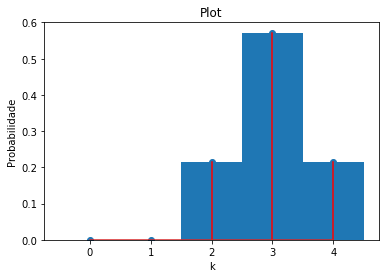

---Valores Praticos ---
Media: 3.000636 Variancia: 0.4283395955039999
---Valores Teoricos ---
Media: 3.0 Variancia: 0.42857142857142855


In [202]:

#pmf_1b(g,r,t,n,k)

#Pratico
t,g,k = 8,4,6
M = t
n = g
N = k
R = hypergeom.rvs(M, n, N, size=1000000)
plt.hist(R,bins=np.arange(0, n+2)-0.5,normed='True')


#Teorico
rv = hypergeom(M, n, N)
x = np.arange(0, n+1)
y = rv.pmf(x)
plt.stem(x,y,'r')
plt.title("Plot")
plt.xlabel("k")
plt.ylabel("Probabilidade")
plt.show()
print("---Valores Praticos ---")
print("Media: {} Variancia: {}".format(np.mean(R),np.var(R)))
print("---Valores Teoricos ---")
print("Media: {} Variancia: {}".format(hypergeom.mean(M,n,N),hypergeom.var(M,n,N)))

### Para (t, g, n) = (100, 20, 95)

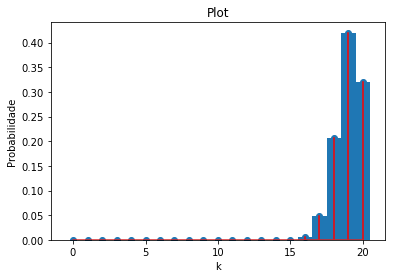

---Valores Praticos ---
Media: 19.00106 Variancia: 0.7668448764000003
---Valores Teoricos ---
Media: 19.0 Variancia: 0.7676767676767676


In [203]:
#Pratico
t, g, k = 100, 20, 95
M = t
n = g
N = k
R = hypergeom.rvs(M, n, N, size=1000000)
plt.hist(R,bins=np.arange(0, n+2)-0.5,normed='True')
#Teorico
rv = hypergeom(M, n, N)
x = np.arange(0, n+1)
y = rv.pmf(x)
plt.stem(x,y,'r')
plt.title("Plot")
plt.xlabel("k")
plt.ylabel("Probabilidade")
plt.show()
print("---Valores Praticos ---")
print("Media: {} Variancia: {}".format(np.mean(R),np.var(R)))
print("---Valores Teoricos ---")
print("Media: {} Variancia: {}".format(hypergeom.mean(M,n,N),hypergeom.var(M,n,N)))

## Formulas da segunda parte:


In [7]:
def pmf_2a(n,k,p):
    q = 1-p
    return special.binom(n-1,k-1)*(p**k)*((1-p)**(n-k))

def pmf_2b(t,g,n,k):
    return (special.binom(g,k-1)/special.binom(t,n-1))*((g-k+1)/(t-n+1))*special.binom(t-g,n-k)

def media_2b(t,g,k):
    return round(k*((t+1)/(g+1)),3)

def var_2b(t,g,k):
    return round(k*(((t-g)*(t+1)*(g+1-k))/(((g+1)**2)*(g+2))),3)

def exp_2b(t,g,k):
     s = total =0
     p = 0   
     for i in range(t): 
            a = np.random.uniform(0,1)
            p = g/t
            total += 1 
            if a <= p:
                s += 1
                g -= 1
            if s == k:
                break 
            t -= 1
                  
     return total

* Experimento 2a. Retira-se, uma por uma, bolas da urna, com reposição. O experi-
mento se encerra imediatamente após a k-ésima bola verde ser retirada.
* Experimento 2b. Retira-se, uma por uma, bolas da urna, sem reposição. O experi-
mento se encerra imediatamente após a k-ésima bola verde ser retirada.


N = número total de bolas retiradas no experimento.

3 - Escreva uma função que implementa uma única realização da variável aleatória N do
Experimento 2a, para (t, g, k) genéricos. Em seguida, utilize as funções escritas com
(t, g, k) = (8, 6, 4) e com (t, g, k) = (100, 20, 20).

* Plote figuras contendo a função massa de probabilidade teórica, bem como aquela
obtida via simulação de Monte Carlo.
* Calcule os valores teóricos da média e da variância, bem como aqueles obtidos via
simulação.

### Para (t, g, k) = (8, 6, 4) 

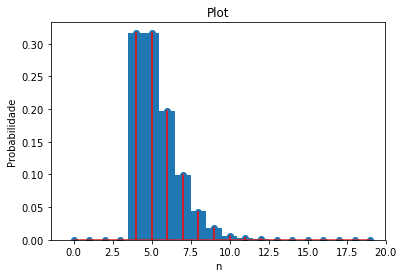

---Valores Praticos ---
Media: 5.332853 Variancia: 1.7802038803909992
---Valores Teoricos ---
Media: 1.333333333333333 Variancia: 1.7777777777777772


In [3]:
t, g, k = 8, 6, 4 
p = g/t

#Pratico
r = nbinom.rvs(k, p, size=1000000,loc=4)
plt.hist(r,bins=np.arange(0, 20)-0.5,normed='True')
#Teorica
y=nbinom.pmf(np.arange(0,20),k,p,loc=4)
plt.stem(np.arange(0, 20),y,'r') 
plt.title("Plot")
plt.xlabel("n")
plt.ylabel("Probabilidade")
plt.show()
media_t = nbinom.mean(k,p)
vari = nbinom.var(k,p)
print("---Valores Praticos ---")
print("Media: {} Variancia: {}".format(np.mean(r),np.var(r)))
print("---Valores Teoricos ---")
print("Media: {} Variancia: {}".format(media_t,vari))


### Para (t, g, k) = (100, 20, 20)

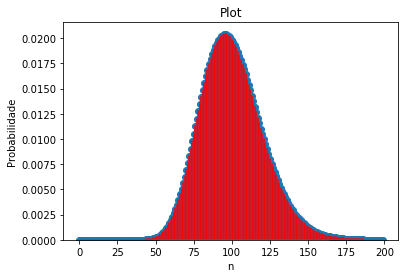

---Valores Praticos ---
Media: 100.012635 Variancia: 400.14398735677514
---Valores Teoricos ---
Media: 80.0 Variancia: 400.0


In [4]:
t, g, k = 100, 20, 20
p = g/t
#Pratico
r = nbinom.rvs(k, p, size=1000000,loc=20)
plt.hist(r,bins=np.arange(0, 200)-0.5,normed='True')
#Teorica
y=nbinom.pmf(np.arange(0, 200),k,p,loc=20)
plt.stem(np.arange(0, 200),y,'r') 
plt.title("Plot")
plt.xlabel("n")
plt.ylabel("Probabilidade")
plt.show()
media_t = nbinom.mean(k,p)
vari = nbinom.var(k,p)
print("---Valores Praticos ---")
print("Media: {} Variancia: {}".format(np.mean(r),np.var(r)))
print("---Valores Teoricos ---")
print("Media: {} Variancia: {}".format(media_t,vari))

 ### Repita o exercício anterior, agora considerando o Experimento 2b.

### Para (t, g, k) = (8, 6, 4) 

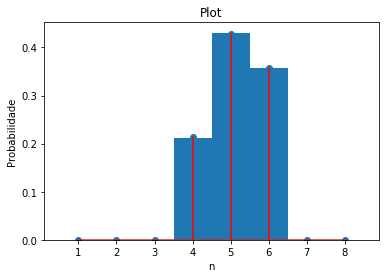

Valores Praticos:
Media: 5.14505 Variancia: 0.5483304975
Valores Teoricos:
Media: 5.143 Variancia: 0.551


In [8]:
#Pratica
t, g, k = 8, 6, 4
r = []
for i in range(100000):
    r.append(exp_2b(t,g,k))
plt.hist(r,bins=np.arange(1,10)-0.5,normed='True')  
#Teorica
R = []
for i in range(1,t+1):
    R.append(pmf_2b(t,g,i,k))
  
plt.stem(range(1,t+1),R,'r') 
plt.title("Plot")
plt.xlabel("n")
plt.ylabel("Probabilidade")
plt.show()
print("Valores Praticos:")
print("Media: {} Variancia: {}".format(np.mean(r),np.var(r)))
print("Valores Teoricos:")
print("Media: {} Variancia: {}".format(media_2b(t,g,k),var_2b(t,g,k)))

### Para (t, g, k) = (100, 20, 20)

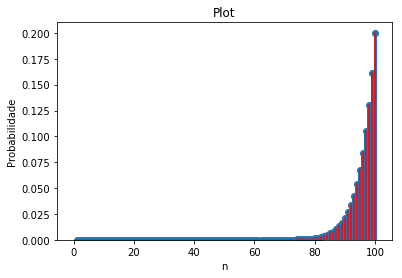

Valores Praticos:
Media: 96.19363 Variancia: 16.574497423100002
Valores Teoricos:
Media: 96.19 Variancia: 16.656


In [9]:
#Pratica
t, g, k = 100, 20, 20
r = []
for i in range(100000):
    r.append(exp_2b(t,g,k))
plt.hist(r,bins=np.arange(0,102)-0.5,normed='True')  
#Teorica
R = []
for i in range(1,t+1):
    R.append(pmf_2b(t,g,i,k))
plt.stem(range(1,t+1),R,'r') 
plt.title("Plot")
plt.xlabel("n")
plt.ylabel("Probabilidade")
plt.show()
print("Valores Praticos:")
print("Media: {} Variancia: {}".format(np.mean(r),np.var(r)))
print("Valores Teoricos:")
print("Media: {} Variancia: {}".format(media_2b(t,g,k),var_2b(t,g,k)))

